## Laptop Price Predictor

### 1) Problem statement
- This project understands how the laptop's price is affected by other variables such as Company, Product, TypeName,size, Screen resolution, Cpu, Ram ,Memory,Gpu,OpSys and Weight


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/muhammetvarl/laptop-price
- The data consists of 13 column and 1303 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('D:\\Study\\ML-Projects\\Project-2(Laptop_Price_Predictor)\\notebooks\\data\\laptop_price.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Shape of the dataset

    1 Company- String -Laptop Manufacturer
    2 Product -String -Brand and Model
    3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
    4 Inches -Numeric- Screen Size
    5 ScreenResolution -String- Screen Resolution
    6 Cpu- String -Central Processing Unit (CPU)
    7 Ram -String- Laptop RAM
    8 Memory -String- Hard Disk / SSD Memory
    9 GPU -String- Graphics Processing Units (GPU)
    10 OpSys -String- Operating System
    11 Weight -String- Laptop Weight
    12 Price_euros -Numeric- Price (Euro)

### 3.1 Checking Missing values

In [4]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### There are no missing values in the data set

### 3.2 Checking Duplicates

In [5]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [6]:
# Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

### 3.5 Checking statistics of data set

In [8]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### 3.7 Exploring Data

In [9]:
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
137,140,Asus,FX753VD-GC086T (i5-7300HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,938.0
701,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.0
348,354,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,375.0
643,651,Asus,ROG GL553VE-FY022,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050 Ti,No OS,2.5kg,1169.0
451,458,Dell,Precision 3520,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.17kg,1975.0
234,239,Acer,Aspire R7,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.6kg,689.0
1293,1311,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.0
225,230,Acer,Aspire E5-576G,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.2kg,832.0
1274,1292,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0
385,391,Lenovo,Thinkpad X1,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.13kg,2282.0


#### Removing Laptop_ID column Which has no value

In [10]:
df=df.drop('laptop_ID',axis=1)

In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Scren Resolution needs to be changed into multiple category columns

In [12]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

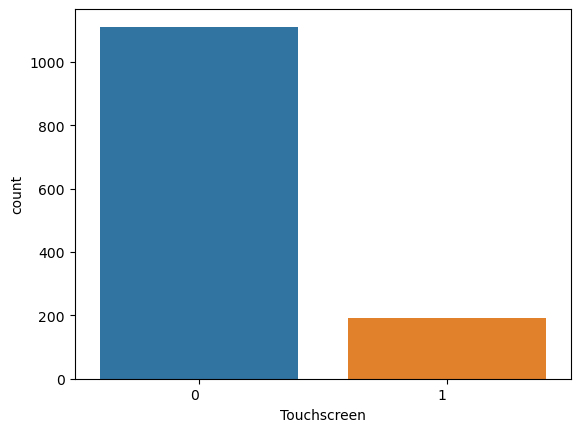

In [13]:
sns.countplot(x='Touchscreen', data=df, order=df['Touchscreen'].value_counts().index)
plt.xticks(rotation=0, ha='right')
plt.show()

In [14]:
# IPS or not
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

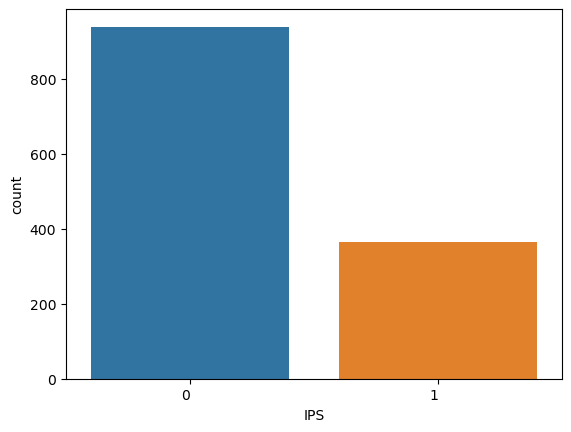

In [15]:
sns.countplot(x='IPS', data=df, order=df['IPS'].value_counts().index)
plt.xticks(rotation=0, ha='right')
plt.show()

In [16]:
# x_Resolution
new = df['ScreenResolution'].str.strip().str.split('x',expand=True)
x_res = new[0].str[-4:]
df['x_res'] = x_res
df['y_res'] = new[1]
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [17]:
df['ppi'] = ((df['x_res']**2 + df['y_res']**2)**.5)/df['Inches']

In [18]:
df.sample(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi
770,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.3kg,1181.27,0,0,1920,1080,141.211998
966,Dell,Latitude 5580,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,825.00,0,0,1366,768,100.454670


#### Removing ScreenResolution,x_res,y_res,Inches columns because we already made Touchscreen,IPS,ppi column using them

In [19]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],axis=1,inplace=True)

In [20]:
df.sample(2)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi
518,HP,Probook 450,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04kg,889.0,0,0,141.211998
879,HP,ProBook 450,Notebook,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.04kg,839.0,0,0,141.211998


#### Cpu column needs to be change into different category columns

In [21]:
def cpu_categories(x):
    if 'Intel Core i5' in x:
        return 'Intel Core i5'
    elif 'Intel Core i7' in x:
        return 'Intel Core i7'
    elif 'Intel Core i3' in x:
        return 'Intel Core i3'
    elif 'AMD' in x:
        return 'AMD Processor'
    else:
        return 'Other Intel processors'

In [22]:
df['Cpu_Brand'] = df['Cpu'].apply(cpu_categories)

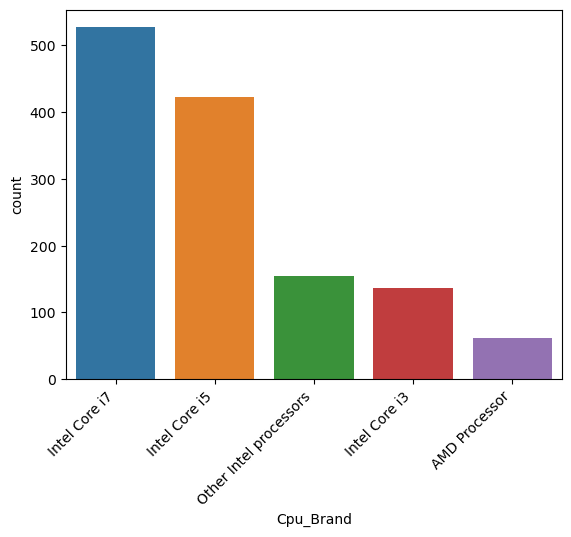

In [23]:
sns.countplot(x='Cpu_Brand', data=df, order=df['Cpu_Brand'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### No longer needed Cpu column

In [24]:
df.drop(columns=['Cpu'],inplace=True)

In [25]:
df.sample(1)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu_Brand
1071,HP,ProBook 650,Notebook,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.31kg,1199.0,0,0,100.45467,Intel Core i5


#### Ram can be made as a INT type feature

In [26]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [27]:
# changing data type
df['Ram'] = df['Ram'].astype(int)

#### Memory

In [28]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [29]:
df['Memory'] = df['Memory'].str.replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first_part"]= new[0]
df["first_part"]=df["first_part"].str.strip()

df["second_part"]= new[1]
                  
df["first_part_HDD"] = df["first_part"].apply(lambda x: 1 if "HDD" in x else 0)
df["first_part_SSD"] = df["first_part"].apply(lambda x: 1 if "SSD" in x else 0)
df["first_part_Hybrid"] = df["first_part"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["first_part_Flash_Storage"] = df["first_part"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first_part'] = df['first_part'].str.replace(r'\D', '') #replaces any non-digit character with an empty string
df["first_part"] = df["first_part"].astype(int)
df['first_part'] = df['first_part'].apply(lambda x:  24*int(x/1000)+x if x>=1000 else x)
df['first_part'] = df['first_part'].apply(lambda x:  512 if x>=500 and x<=520 else x)


df["second_part"].fillna("0", inplace = True)
df["second_part_HDD"] = df["second_part"].apply(lambda x: 1 if "HDD" in x else 0)
df["second_part_SSD"] = df["second_part"].apply(lambda x: 1 if "SSD" in x else 0)
df["second_part_Hybrid"] = df["second_part"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["second_part_Flash_Storage"] = df["second_part"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second_part'] = df['second_part'].str.replace(r'\D', '')
df["second_part"] = df["second_part"].astype(int)
df['second_part'] = df['second_part'].apply(lambda x:  24*int(x/1000)+x if x>=1000 else x)
df['second_part'] = df['second_part'].apply(lambda x:  512 if x>=500 and x<=520 else x)




In [30]:
df['first_part'].value_counts()

256     508
512     273
1024    250
128     177
32       45
64       17
2048     16
16       10
180       5
240       1
8         1
Name: first_part, dtype: int64

#### Weight can be made as a Float type feature

In [31]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [32]:
# changing data type
df['Weight'] = df['Weight'].astype(float)

#### Price_euros need to be converted to Price_bdt

In [33]:
df['Price_euros'] = df['Price_euros']*120.53

#### Renaming required columns

In [34]:
df.rename(columns={'Ram':'Ram(GB)','Weight':'Weight(kg)','Price_euros':'Price_bdt','Inches':'Size'},inplace=True)

In [35]:
df.sample(5)

,Company,Product,TypeName,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_bdt,Touchscreen,...,first_part,second_part,first_part_HDD,first_part_SSD,first_part_Hybrid,first_part_Flash_Storage,second_part_HDD,second_part_SSD,second_part_Hybrid,second_part_Flash_Storage
317,Lenovo,ThinkPad 13,Notebook,4,16 Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,55431.747,0,...,16,0,0,0,0,1,0,0,0,0
400,Lenovo,IdeaPad 320-15IAP,Notebook,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.20,36882.180,0,...,1024,0,1,0,0,0,0,0,0,0
470,HP,Spectre x360,2 in 1 Convertible,8,512 SSD,Intel UHD Graphics 620,Windows 10,1.29,240939.470,1,...,512,0,0,1,0,0,0,0,0,0
1032,MSI,GL72M 7RDX,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,143647.654,0,...,128,1024,0,1,0,0,1,0,0,0
373,Lenovo,IdeaPad 110-17ACL,Notebook,4,128 SSD,AMD Radeon R5,Windows 10,2.60,58939.170,0,...,128,0,0,1,0,0,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1303 non-null   object 
 1   Product                    1303 non-null   object 
 2   TypeName                   1303 non-null   object 
 3   Ram(GB)                    1303 non-null   int32  
 4   Memory                     1303 non-null   object 
 5   Gpu                        1303 non-null   object 
 6   OpSys                      1303 non-null   object 
 7   Weight(kg)                 1303 non-null   float64
 8   Price_bdt                  1303 non-null   float64
 9   Touchscreen                1303 non-null   int64  
 10  IPS                        1303 non-null   int64  
 11  ppi                        1303 non-null   float64
 12  Cpu_Brand                  1303 non-null   object 
 13  first_part                 1303 non-null   int64

In [37]:
df.describe()

,Ram(GB),Weight(kg),Price_bdt,Touchscreen,IPS,ppi,first_part,second_part,first_part_HDD,first_part_SSD,first_part_Hybrid,first_part_Flash_Storage,second_part_HDD,second_part_SSD,second_part_Hybrid,second_part_Flash_Storage
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.0
mean,8.382195,2.038734,135437.993092,0.147352,0.280123,146.635987,449.028396,172.303914,0.287797,0.646969,0.007675,0.057559,0.155027,0.003070,0.001535,0.0
std,5.084665,0.665475,84251.559897,0.354593,0.449231,43.121345,366.229006,412.270525,0.452910,0.478096,0.087301,0.232998,0.362069,0.055342,0.039163,0.0
min,2.000000,0.690000,20972.220000,0.000000,0.000000,90.583402,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,1.500000,72197.470000,0.000000,0.000000,127.335675,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,8.000000,2.040000,117757.810000,0.000000,0.000000,141.211998,256.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,8.000000,2.300000,179334.176400,0.000000,1.000000,157.350512,512.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,64.000000,4.700000,735112.470000,1.000000,1.000000,352.465147,2048.000000,2048.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Insight
- Minimum laptop size starts from 10.1 inches and max can be 18.4 inches. Average size is 15 inches
- Minimum ram is 2 GB and maximum is 64 GB. In average laptop contains 8 GB of ram.
- Minimum Weight is 0.69 kg and maximum is 4.7 kg. In average laptops are 2.03 KG in weight.
- Laptop price starts from 20972.22 BDT and goes maximum 735112 BDT.

### 4. Exploring Data ( Visualization )
#### 4.1 Visualization of average score distribution to make some conclusion. 
- Countplot
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Countplot

#### Laptop companies in the dataset

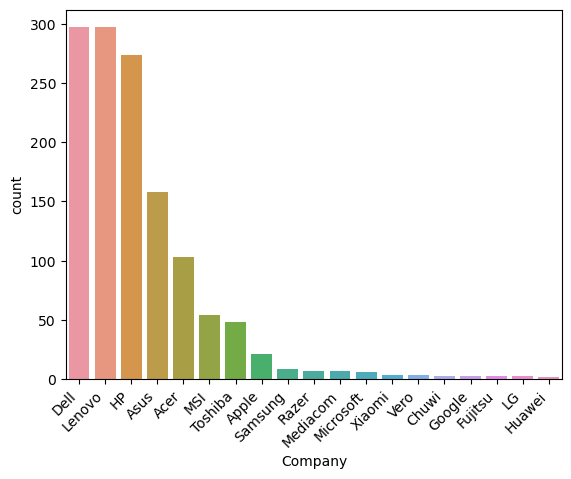

In [38]:
sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Types of laptops are in the dataset

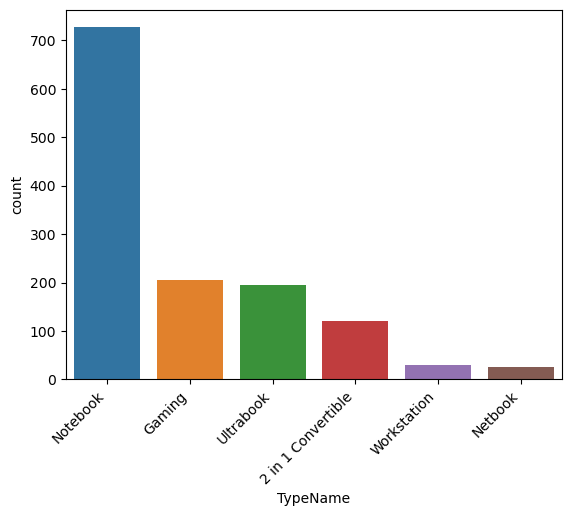

In [39]:
sns.countplot(x='TypeName', data=df, order=df['TypeName'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Types of operating system are in the dataset

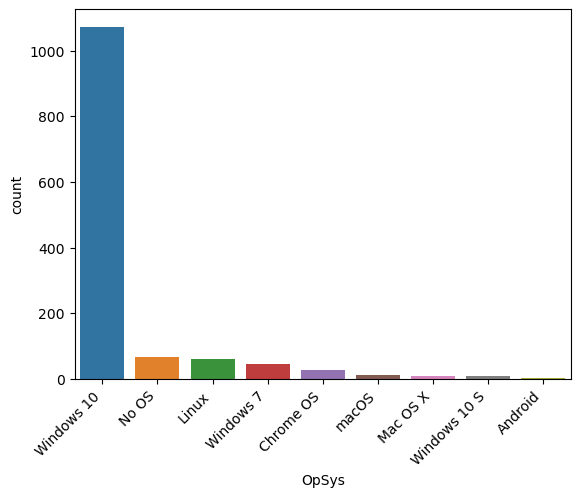

In [40]:
sns.countplot(x='OpSys', data=df, order=df['OpSys'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4.1.2 Histogram & KDE

ValueError: Could not interpret value `Size` for parameter `x`

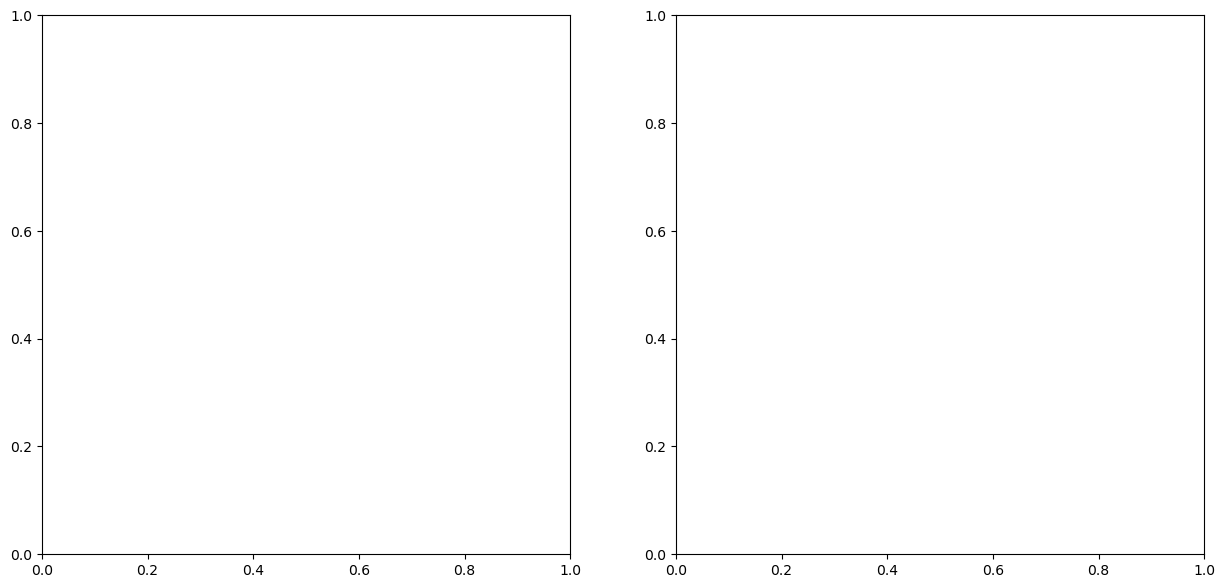

In [41]:
# size
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Size',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Size',kde=True,hue='TypeName')
plt.show()

In [ ]:
# Ram(GB)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Ram(GB)',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Ram(GB)',kde=True,hue='TypeName')
plt.show()

In [ ]:
# Weight(kg)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Weight(kg)',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Weight(kg)',kde=True,hue='TypeName')
plt.show()

In [ ]:
# Price_bdt
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Price_bdt',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Price_bdt',kde=True,hue='TypeName')
plt.show()

#### 4.2 Maximum values in numerical columns

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
plt.title('Display Sizes')
sns.violinplot(y='Size',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Ram Sizes')
sns.violinplot(y='Ram(GB)',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Weights')
sns.violinplot(y='Weight(kg)',data=df,color='yellow',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Price in BDT')
sns.violinplot(y='Price_bdt',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above four plots its clearly visible that most of the Display size are between 15-16 inches, rams are between 4-8 GB, Weights are between 2-2.5 kg and prices are between 50k-100k

#### BIVARIATE ANALYSIS ( Does Company have any impact on Laptop prices ? ) 

In [ ]:
company_group = df.groupby('Company').mean().reset_index()
company_group_sorted = company_group.sort_values(by='Price_bdt', ascending=False)
sns.barplot(x='Company', y='Price_bdt', data=company_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop Company')
plt.ylabel("Average Price")
plt.show()

#### Insights
- From the above four plots its clearly visible that Razer creates the most costly laptops and the least costly laptops are from Vero.

#### 4.3 BIVARIATE ANALYSIS ( Does Laptop type have any impact on Laptop prices ? ) 

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,4,1)
type_group = df.groupby('TypeName').mean().reset_index()
type_group_sorted = type_group.sort_values(by='Price_bdt', ascending=False)
sns.barplot(x='TypeName', y='Price_bdt', data=type_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop Type')
plt.ylabel("Average Price")

plt.subplot(1,4,2)
os_group = df.groupby('OpSys').mean().reset_index()
os_group_sorted = os_group.sort_values(by='Price_bdt', ascending=False)
sns.barplot(x='OpSys', y='Price_bdt', data=os_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop OS')
plt.ylabel("Average Price")
plt.show()

#### Insights
- Workstations and gaming laptops are most costly while Netbook and Notebooks are least costly
- macOS are the most expensive operating system there where Android is the least expensive

#### 4.4 CHECKING OUTLIERS

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 5))
sns.boxplot(df['Size'], color='skyblue', ax=axes[0, 0])
sns.boxplot(df['Ram(GB)'], color='hotpink', ax=axes[0, 1])
sns.boxplot(df['Weight(kg)'], color='yellow', ax=axes[1, 0])
sns.boxplot(df['Price_bdt'], color='lightgreen', ax=axes[1, 1])
plt.tight_layout()
plt.show()

#### 4.5 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df,hue = 'Company')
plt.show()